In [1]:
import numpy as np

# importamos bibliotecas para plotear
import matplotlib
import matplotlib.pyplot as plt

# para desplegar los plots en el notebook
%matplotlib inline

# para cómputo simbólico
from sympy import *

# configuramos los símbolos alfa, beta, x y f para su uso en sympy
alpha, beta, x = symbols('alpha beta x')
f = symbols('f', cls=Function)
init_printing()

# importamos slider para experimentos interactivos
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets


def cobweb(f, x, y):
    """
    Dibuja un diagrama de telaraña para una función.
    """
    plt.axhline(linewidth=1.0, color="black")
    plt.axvline(linewidth=1.0, color="black")
    plt.ylim((y.min(),y.max()))
    indep = np.linspace(x.min(), x.max(), len(x))
        
    # grafica la funcion 
    plt.plot(indep,f(indep),'blue')
        
    # grafica la diagonal
    plt.plot(indep, indep, 'black')

    # grafica la telaraña
    y0 = f(x[0])
    x0 = x[0]
    for i in range(len(x)):
        plt.hlines(y0, x0, y0,'r')
        x0 = y0
        y0 = f(x0)
        plt.vlines(x0, x0, y0,'r')

# La función

Esta ecuación por Glass y Pasternack (1978) sirve para modelar redes neuronales y de interacción génica.

$$x_{t+1}=\frac{\alpha x_{t}}{1+\beta x_{t}}$$

Donde $\alpha$ y $\beta$ son números positivos y $x_{t}\geq0$.

In [2]:
def g(x, alpha, beta):
    assert alpha >= 0 and beta >= 0
    return (alpha*x)/(1 + (beta * x))

<function __main__.plot_cobg>

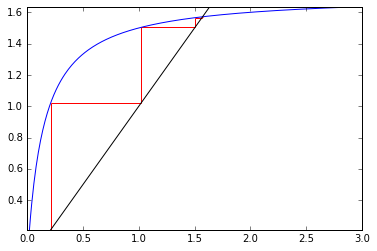

In [3]:
def plot_cobg(x, alpha, beta):  
    y = np.linspace(x[0],x[1],300)
    g_y = g(y, alpha, beta)
    cobweb(lambda x: g(x, alpha, beta), y, g_y)
    
interact(plot_cobg,
         x=widgets.FloatRangeSlider(min=0.01, max=3, step=0.01, value=[0.02,3], continuous_update=False),
         alpha=widgets.FloatSlider(min=0.001,max=30,step=0.01,value=12, continuous_update=False),
         beta=widgets.FloatSlider(min=0.001,max=30,step=0.01,value=7, continuous_update=False))

# Búsqueda algebráica de puntos fijos

A continuación sustituiremos f(x) en x reiteradamente hasta obtener la cuarta iterada de f.

In [4]:
f0 = (alpha*x)/(1+beta*x)
# subs-tituye f0 en la x de f0 para generar f1
f1 = simplify(f0.subs(x, f0))
# item
f2 = simplify(f1.subs(x, f1))
# etc
f3 = simplify(f2.subs(x, f2))

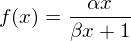

In [5]:
Eq(f(x),f0)

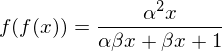

In [6]:
# segunda iterada
Eq(f(f(x)), f1)

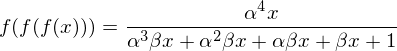

In [7]:
# tercera iterada
Eq(f(f(f(x))), f2)

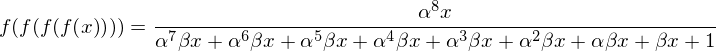

In [8]:
# cuarta iterada
Eq(f(f(f(f(x)))), f3)

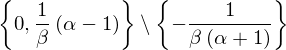

In [9]:
# puntos fijos resolviendo la primera iterada
solveset(Eq(f1,x),x)

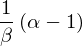

In [10]:
(alpha-1)/beta

# Punto fijo oscilatorio

Al configurar $$\alpha, \beta$$ de modo que haya un punto fijo la serie de tiempo revela una oscilación entre cero y el punto fijo.

ultimos 15 de la serie:
[2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0]

puntos fijos:


<function __main__.solve_g>

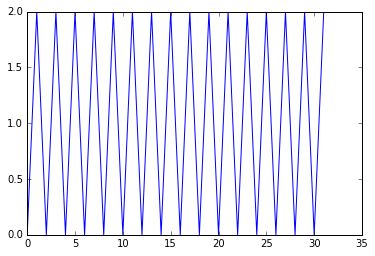

In [11]:
def solve_g(a, b):
    y = list(np.linspace(0,float(list(solveset(Eq(f1.subs(alpha, a).subs(beta, b), x), x)).pop()),2))

    for t in range(30):
        y.append(g(y[t], a, b))
    zoom = plt.plot(y)

    print("ultimos 15 de la serie:")
    pprint(y[-15:])
    print("\npuntos fijos:")
    return solveset(Eq(f1.subs(alpha, a).subs(beta, b), x), x)
    

interact(solve_g,
         a=widgets.IntSlider(min=0,max=30,step=1,value=11, continuous_update=False, description='alpha'),
         b=widgets.IntSlider(min=0,max=30,step=1,value=5, continuous_update=False, description='beta'))

# ¿Qué pasará con infinitas iteraciones?

Todo parece indicar que la función converge a 1 si $\alpha=1$ y $\beta=1$.

Si no, converge a $\frac{\alpha}{\beta}$

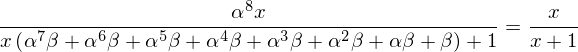

In [12]:
# con alfa=1 y beta=1
Eq(collect(f3, x), x/(x+1))

(0.0, 1.0)


<function __main__.plot_g>

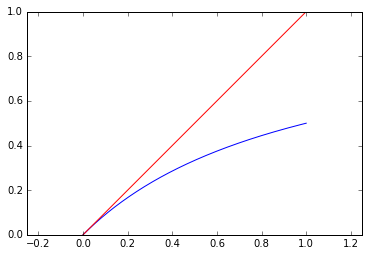

In [13]:


def plot_g(x, alpha, beta):
    pprint(x)
    y = np.linspace(x[0],x[1],300)
    g_y = g(y, alpha, beta)
    fig1 = plt.plot(y, g_y)
    fig1 = plt.plot(y, y, color='red')
    plt.axis('equal')

interact(plot_g,
         x=widgets.FloatRangeSlider(min=0, max=30, step=0.01, value=[0,1], continuous_update=False),
         alpha=widgets.IntSlider(min=0,max=30,step=1,value=1, continuous_update=False),
         beta=widgets.IntSlider(min=0,max=30,step=1,value=1, continuous_update=False))
